In [86]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [87]:
df = pd.read_csv('Heart_Disease .csv')
df.shape

(303, 14)

In [88]:
df.head(3)


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1


In [89]:

df.hd.value_counts() # df.target.unique()


hd
0    164
1    139
Name: count, dtype: int64

In [90]:
disease = len(df[df['hd'] == 1])
no_disease = len(df[df['hd']== 0])

In [91]:
# Replace missing values with NaN
df.replace('?', np.nan, inplace=True)

In [92]:
# Convert columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [93]:
# Drop rows with missing values
df.dropna(inplace=True)
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    int64  
 1   sex      297 non-null    int64  
 2   cp       297 non-null    int64  
 3   restbp   297 non-null    int64  
 4   chol     297 non-null    int64  
 5   fbs      297 non-null    int64  
 6   restecg  297 non-null    int64  
 7   thalach  297 non-null    int64  
 8   exang    297 non-null    int64  
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    int64  
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


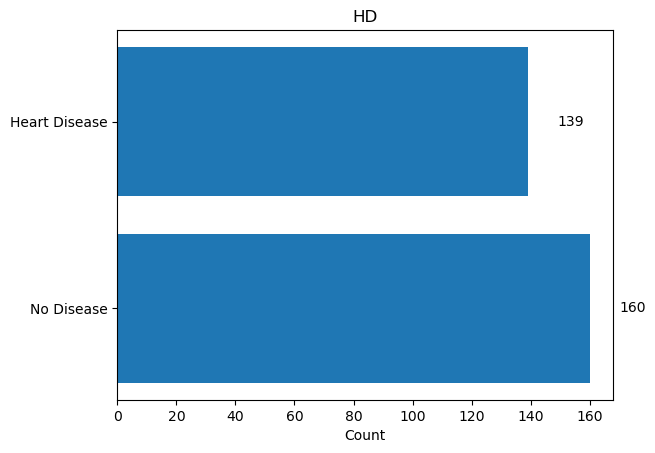

In [95]:
no_disease = len(df[df['hd']== 0])
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('HD')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

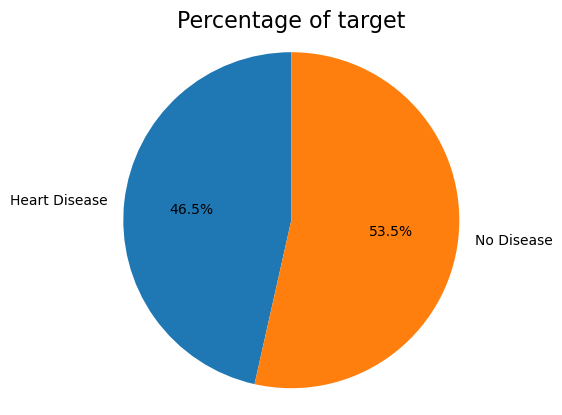

In [96]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [97]:
df.isna().sum() # missing values


age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [98]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [99]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'hd']

In [100]:
quantitative

['age', 'restbp', 'chol', 'thalach', 'oldpeak']

In [101]:
df.corr()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
restbp,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


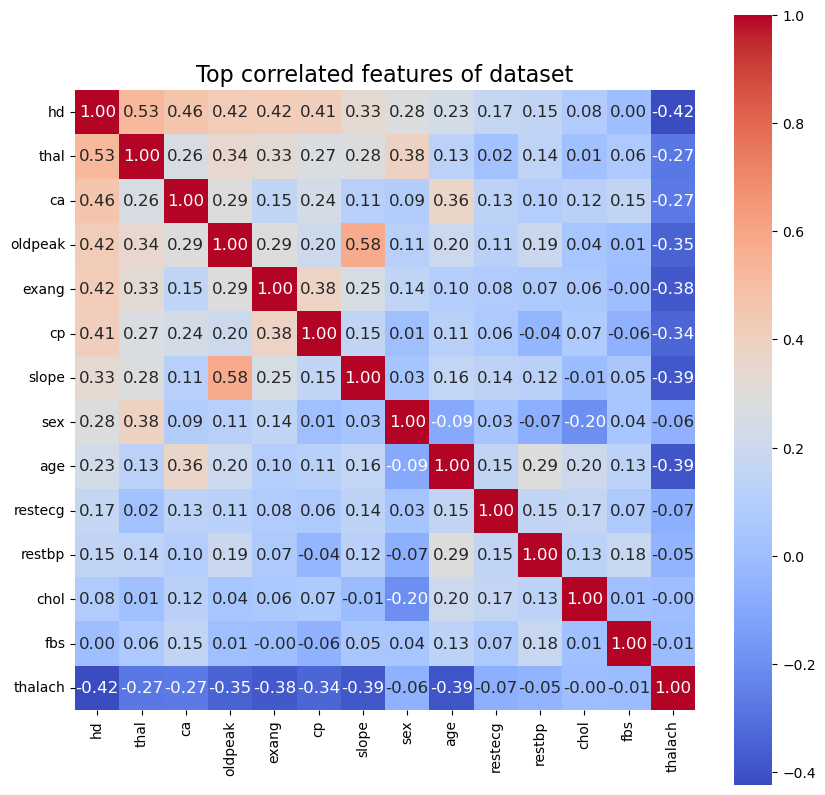

In [102]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'hd')['hd'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()


In [103]:
# Split data into features and target
X = df.drop('hd', axis=1)
y = df['hd']
y = y >= 1
print(y)

0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool


In [104]:
# Encoding categorical variables
X_encoded = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [105]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(y_train)

277    False
262    False
30     False
22      True
281    False
       ...  
190    False
71      True
107     True
274     True
103    False
Name: hd, Length: 237, dtype: bool


In [106]:
# Building the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier()

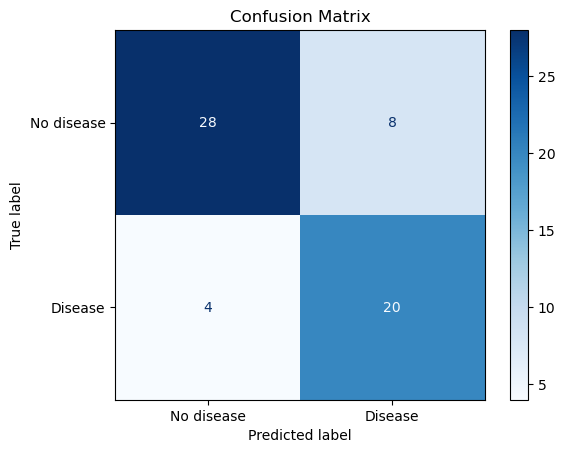

In [107]:
# Importing necessary library
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)



# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No disease","Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

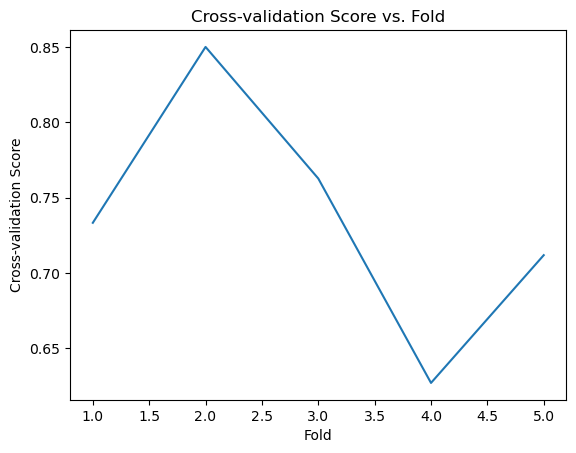

In [108]:
# Finding cross-validation score and plotting it
cv_scores = cross_val_score(clf, X_encoded, y, cv=5)
plt.plot(range(1, 6), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Cross-validation Score')
plt.title('Cross-validation Score vs. Fold')
plt.show()

In [109]:
# Building a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
# Printing the feature importance array
feature_importances = rf_model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X_encoded.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importance:
age: 0.08321595105624648
restbp: 0.07304498919722292
chol: 0.08258397538375609
thalach: 0.1056176251325031
oldpeak: 0.09266168201522013
ca: 0.11120239386302284
sex_0: 0.018861054682082077
sex_1: 0.014310099199952101
cp_1: 0.010488804826487959
cp_2: 0.010040471243046903
cp_3: 0.01895757496388778
cp_4: 0.08088226046968787
fbs_0: 0.006977680238969682
fbs_1: 0.008812428974831877
restecg_0: 0.011274149243572007
restecg_1: 0.00037780044046029516
restecg_2: 0.013295535432745885
exang_0: 0.032930917737060306
exang_1: 0.04035620207304168
slope_1: 0.020699769441428047
slope_2: 0.019848618727828227
slope_3: 0.004187267158925488
thal_3.0: 0.056839987502085514
thal_6.0: 0.004821972045551775
thal_7.0: 0.0777107889503829


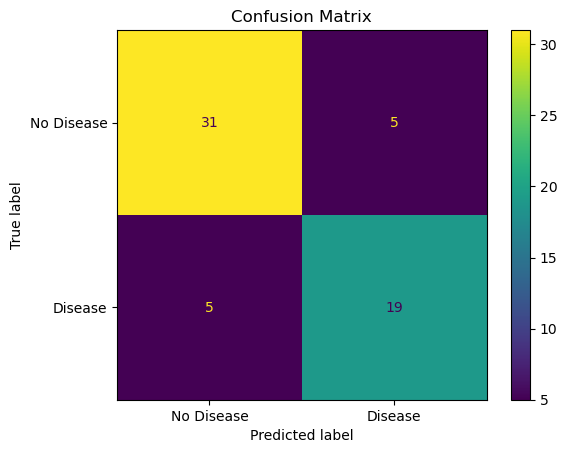

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay


# Plotting the confusion matrix using ConfusionMatrixDisplay
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Disease', 'Disease'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

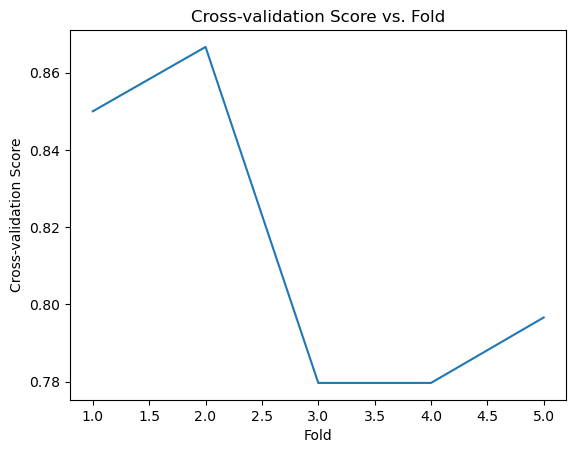

In [112]:
# Finding cross-validation score and plotting it
cv_scores = cross_val_score(rf_model, X_encoded, y, cv=5)
plt.plot(range(1, 6), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Cross-validation Score')
plt.title('Cross-validation Score vs. Fold')
plt.show()


In [113]:
# Printing Classification score
print("Classification Report:")
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.86      0.86        36
        True       0.79      0.79      0.79        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [114]:
# Finding the optimal Parameters for the model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Optimal Parameters:")
print(grid_search.best_params_)

Optimal Parameters:
{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
